In [155]:
import pandas as pd
import re
data = pd.read_csv("/home/cso/Downloads/as_tweets.txt",delimiter="\t")

In [156]:
len(data)

99155

In [157]:
display(data.head(74))

,American Sniper
0,If American Sniper doesn't make you proud to b...
1,Retweet if you're going to see the movie Ameri...
2,Retweet if you're going to see the movie Ameri...
3,Retweet if you're going to see the movie Ameri...
4,Fav if you're going to see the movie American ...
5,I just watched American Sniper. You have to se...
6,Did you know #Jesseventura sued fallen seal es...
7,American Sniper kind of reminds me of the movi...
8,"Did y’all see ""American Sniper""? What a powerf..."
9,american sniper قصة حقيقية 2015 1- http://t.c...


In [158]:
data = data.rename(columns={'American Sniper': 'tweets'})

In [159]:
# data['len']  = [len(t) for t in data['tweets']]

In [160]:
data['hashtags'] = data['tweets'].apply(lambda x: [x for x in x.split() if x.startswith('#')])
data['hashtags'] = data['hashtags'].apply(', '.join)
data['hashtags'] = data['hashtags'].apply(lambda x: x.replace('#',''))

In [161]:
data['mentions'] = data['tweets'].apply(lambda x: [x for x in x.split() if x.startswith('@')])
data['mentions'] = data['mentions'].apply(', '.join)
# data['mentions'] = data['mentions'].apply(lambda x: x.replace('@',''))

In [162]:
# !pip install ekphrasis
# !pip install ujson
from ekphrasis.classes.segmenter import Segmenter

seg_tw = Segmenter(corpus="twitter")

seg_eng = Segmenter(corpus="english")

Reading twitter - 1grams ...
Reading twitter - 2grams ...
Reading english - 1grams ...
Reading english - 2grams ...


In [163]:
#data['hashwords'] = 
data['hashwords'] = data['hashtags'].apply(lambda x: seg_tw.segment(x))  #seg_tw.segment(w)

In [164]:
data['tweets'] = data['tweets'].apply(lambda x: re.sub('  ', ' ', x))

In [165]:
#https://stackoverflow.com/questions/8689795/how-can-i-remove-non-ascii-characters-but-leave-periods-and-spaces-using-python

# s = "some\x00string. wi😂th\x15فيلم بحكي سيرة القناص الامريكي المثير للجدل كريس كايل # اون لاين funny❤️⚓️💪🎯🔫🏆➡🇺🇸🍔💪😂เหมือนมากแถมเล่นดีจนได้ชิงนำชายออสการ์ characters"
import string
printable = set(string.printable)
# ''.join(list(filter(lambda x: x in printable, s)))

def remove_non_english(x):
    return "".join(list(filter(lambda x: x in printable, x)))

# def remove_hash_mentions(y):
#     temp = " ".join(filter(lambda x:x[0]!='#', y.split()))
#     temp = " ".join(filter(lambda x:x[0]!='@', temp.split()))
#     return temp
    


In [166]:
data['tweets'] = data['tweets'].apply(remove_non_english)
# data['tweets'] = data['tweets'].apply(remove_hash_mentions)

In [167]:
#Then write some code to modify your text according to the dictionary, something like this:

# text="What's the best way to don't this?"

contractions = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"yall": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

def appostrophe(text):
    for word in text.split():
        if word.lower() in contractions:
            text = text.replace(word, contractions[word.lower()])
    return text
    #print(text)

######################################################
data['tweets'] = data['tweets'].apply(appostrophe)
######################################################

In [168]:
# !pip install tweet-preprocessor
#urls
import preprocessor as p

data['ptweets'] = data['tweets'].apply(lambda x: p.clean(x))
# removing the http links availaible in data
# import re
# data['ptweets'] = data['tweets'].replace(r'http\S+','',regex=True).replace(r'https\S+','',regex=True).replace(r'www\S+', '', regex=True)

In [181]:
data['new_tweets'][31]

': movie going see? sure yet.. really wanna see american sniper'

In [170]:
data['new_tweets'] = data[['ptweets','hashwords','mentions']].apply(lambda x: ' '.join(x), axis=1)

In [173]:
#Removing english stopwords
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['new_tweets'] = [x.lower() for x in data['new_tweets']]
data['new_tweets'] = data['new_tweets'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['new_tweets'].head()

0    american sniper make proud american, probably ...
1              retweet going see movie american sniper
2              retweet going see movie american sniper
3              retweet going see movie american sniper
4                 fav going see movie american sniper!
Name: new_tweets, dtype: object

In [174]:
ClintEastwood = data[data['new_tweets'].str.contains(r"\bclint\b|\beastwood\b|\bclinteastwood\b|\bclints\b|\beastwoods\b|\bclinteastwoods\b", case = False)]
BradleyCooper = data[data['new_tweets'].str.contains(r"\bbradley\b|\bcooper\b|\bbradleycooper\b|\bbradleys\b|\bcoopers\b|\bbradleycoopers\b", case = False)]
ChrisKyle = data[data['new_tweets'].str.contains(r"\bChris\b|\bkyle\b|\bchriskyle\b|\bChris\b|\bkyles\b|\bchriskyles\b", case = False)]


In [ ]:
Clint_Bradley_Chris

In [183]:
import preprocessor as p

data['new_tweets'] = data['new_tweets'].apply(lambda x: p.clean(x))
ClintEastwood['new_tweets'] = ClintEastwood['new_tweets'].apply(lambda x: p.clean(x))
BradleyCooper['new_tweets'] = BradleyCooper['new_tweets'].apply(lambda x: p.clean(x))
ChrisKyle['new_tweets'] = ChrisKyle['new_tweets'].apply(lambda x: p.clean(x))

/home/cso/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [184]:
import string
data['new_tweets'] = data['new_tweets'].apply(lambda x:"".join([i for i in x if i not in string.punctuation]))
data['new_tweets'] = data['new_tweets'].apply(lambda x:"".join([i for i in x if i not in string.digits]))

ClintEastwood['new_tweets'] = ClintEastwood['new_tweets'].apply(lambda x:"".join([i for i in x if i not in string.punctuation]))
ClintEastwood['new_tweets'] = ClintEastwood['new_tweets'].apply(lambda x:"".join([i for i in x if i not in string.digits]))

BradleyCooper['new_tweets'] = BradleyCooper['new_tweets'].apply(lambda x:"".join([i for i in x if i not in string.punctuation]))
BradleyCooper['new_tweets'] = BradleyCooper['new_tweets'].apply(lambda x:"".join([i for i in x if i not in string.digits]))

ChrisKyle['new_tweets'] = ChrisKyle['new_tweets'].apply(lambda x:"".join([i for i in x if i not in string.punctuation]))
ChrisKyle['new_tweets'] = ChrisKyle['new_tweets'].apply(lambda x:"".join([i for i in x if i not in string.digits]))


/home/cso/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/cso/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/cso/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

In [185]:
print (len(ClintEastwood))
print (len(BradleyCooper))
print (len(ChrisKyle))

4322
4889
5942


In [97]:
import sys
# sys.setrecursionlimit(1500)

In [ ]:
# ClintEastwood['new_tweets'] = ClintEastwood['new_tweets']
# BradleyCooper['new_tweets'] = BradleyCooper['new_tweets']
# ChrisKyle['new_tweets'] = ChrisKyle['new_tweets']



In [192]:
freq = pd.Series(' '.join(ClintEastwood['new_tweets']).split()).value_counts()[:16]
freq = list(freq.index)
# ClintEastwood['new_tweets'] = ClintEastwood['new_tweets'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

/home/cso/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [209]:
unwanted_words = ['di','la','box','office','directors','seal','un','il','weekend','e','goes','via','watch','directed','movies','go','one','new']
freq = pd.Series(' '.join(ClintEastwood['new_tweets']).split()).value_counts()[:30]
freq = list(freq.index)
freq
ClintEastwood['trends'] = ClintEastwood['new_tweets'].apply(lambda x: " ".join(x for x in x.split() if x not in unwanted_words))
freq = pd.Series(' '.join(ClintEastwood['trends']).split()).value_counts()[:10]
freq

['best',
 'director',
 'guild',
 'war',
 'selma',
 'navy',
 'iraq',
 'oscars',
 'great',
 'good']

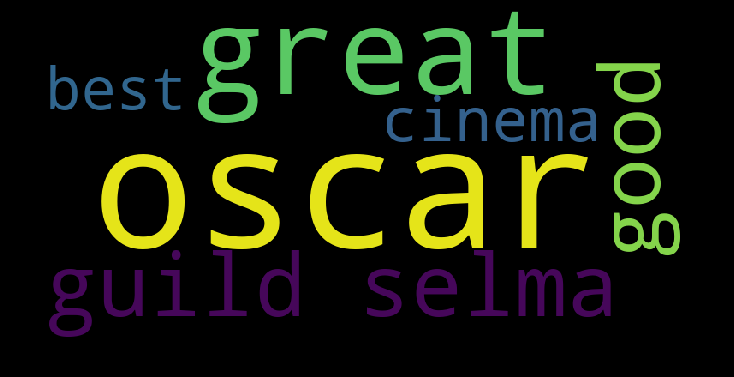

In [223]:
# !pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
words = ' '.join(list(ClintEastwood['trends']))
words_wc = WordCloud(width=800,height=400,background_color='black',max_words=6, mode="RGBA").generate(words)
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(words_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [197]:
freq = pd.Series(' '.join(BradleyCooper['new_tweets']).split()).value_counts()[:11]
freq = list(freq.index)
BradleyCooper['new_tweets'] = BradleyCooper['new_tweets'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))


/home/cso/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [211]:
unwanted_words = ['film']
freq = pd.Series(' '.join(BradleyCooper['new_tweets']).split()).value_counts()[:30]
freq = list(freq.index)
freq
BradleyCooper['trends'] = BradleyCooper['new_tweets'].apply(lambda x: " ".join(x for x in x.split() if x not in unwanted_words))
freq = pd.Series(' '.join(BradleyCooper['trends']).split()).value_counts()[:10]
freq

/home/cso/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


best           418
oscar          387
good           307
great          268
actor          266
oscars         242
performance    233
amazing        232
navy           223
seal           211
dtype: int64

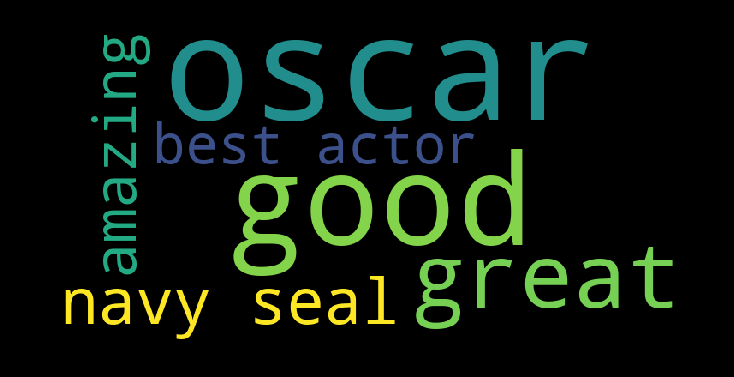

In [224]:
words = ' '.join(list(BradleyCooper['trends']))
words_wc = WordCloud(width=800,height=400,background_color='black',max_words=6, mode="RGBA").generate(words)
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(words_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [202]:
freq = pd.Series(' '.join(ChrisKyle['new_tweets']).split()).value_counts()[:7]
freq = list(freq.index)
ChrisKyle['new_tweets'] = ChrisKyle['new_tweets'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))


/home/cso/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [213]:
unwanted_words = ['author','bradley','cooper','see','seal','rip','navy','mcewen','scott','kyles','taya','film','mt','us','widow','clint','story','true','day','military','like','one','go']
freq = pd.Series(' '.join(ChrisKyle['new_tweets']).split()).value_counts()[:30]
freq = list(freq.index)
freq
ChrisKyle['trends'] = ChrisKyle['new_tweets'].apply(lambda x: " ".join(x for x in x.split() if x not in unwanted_words))
freq = pd.Series(' '.join(ChrisKyle['trends']).split()).value_counts()[:10]
freq

/home/cso/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


honor      770
hero       699
pjnet      314
legend     308
great      268
best       231
amazing    195
watch      182
war        181
good       177
dtype: int64

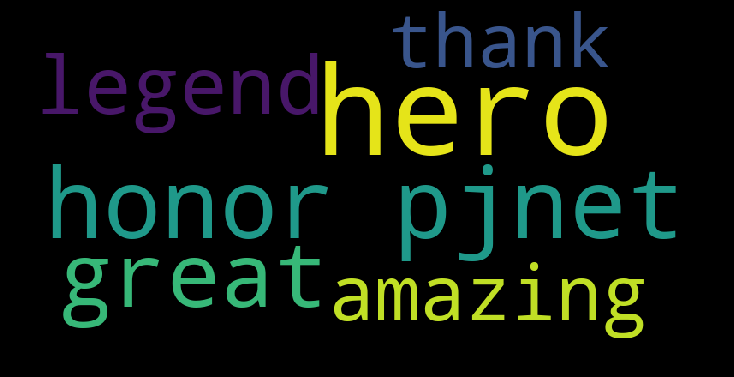

In [225]:
words = ' '.join(list(ChrisKyle['trends']))
words_wc = WordCloud(width=800,height=400,background_color='black',max_words=6, mode="RGBA").generate(words)
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(words_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# unwanted_words = ['retweet', 'american']
# data['ptweets'] = data['ptweets'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
# data['ptweets'].head()

In [81]:
stopwordsl = ['are','is']

dft['c'] = dft['b'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwordsl))
dft

# dft['c'].str.replace(, regex=True)
# def stopwords(x):
#     for word in x.lower().split():
#         print ("1")
#         if word in stopwordsl:
#             return ''

,a,b,c
0,wi]]/-._:===@3444d here,He is there,He there
1,"We're o55ne, what's the btw",How are you?,How you?


In [146]:
aaa = dft[dft['b'].str.contains(r"\bclint\b|\beastwood\b|\bclinteastwood\b|\bclints\b|\beastwoods\b|\bclinteastwoods\b", case = False)]
aaa

,b
0,eastwood is clintthere
2,hello @clint


In [145]:
#test Dataframe
dft = pd.DataFrame()
import string
# dft['a'] = ["wi]]/-._:===@3444d             here             ", "We're o55ne, what's the btw"] 
dft['b'] = ["eastwood is clintthere","How are you?","hello @clint",'ssseastclint'] 
# dft['b'] = dft['a'].apply(lambda x: re.sub('[^A-Za-z]+', ' ', x))
# dft['b'] = dft['a'].apply(lambda x:"".join([i for i in x if i not in string.punctuation]))
# dft['b'] = dft['b'].apply(lambda x:"".join([i for i in x if i not in string.digits]))
# dft['c'] = dft['b'].apply(lambda x: stopwords(x)) 


dft

,b
0,eastwood is clintthere
1,How are you?
2,hello @clint
3,ssseastclint


In [115]:
df = pd.DataFrame({'Year': ['2014 sdfg', '2015dfghj'], 'quarter': ['q1 jk', 'q2sdd']})
df['period'] = df[['Year', 'quarter']].apply(lambda x: ' '.join(x), axis=1)
df

,Year,quarter,period
0,2014 sdfg,q1 jk,2014 sdfg q1 jk
1,2015dfghj,q2sdd,2015dfghj q2sdd
